In [ ]:
#1 Random
import random

def quicksort_random_pivot(arr):
    """Sorts an array using quicksort with a random pivot."""

    if len(arr) <= 1:
        return arr

    # Choose a random pivot index
    pivot_index = random.randint(0, len(arr) - 1)

    # Partition the array around the pivot
    pivot = arr[pivot_index]
    left = [x for x in arr if x < pivot]
    middle = [pivot]
    right = [x for x in arr if x > pivot]

    # Recursively sort the left and right subarrays
    return quicksort_random_pivot(left) + middle + quicksort_random_pivot(right)

# Example usage
array = [3, 8, 2, 5, 1, 9, 6, 7, 4]
sorted_array = quicksort_random_pivot(array)
print(sorted_array)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
#1 Non Random
def quicksort_non_random_pivot(arr):
    """Sorts an array using quicksort with the first element as the pivot."""

    if len(arr) <= 1:
        return arr

    # Choose the first element as the pivot
    pivot = arr[0]

    # Partition the array around the pivot
    left = [x for x in arr[1:] if x < pivot]
    middle = [pivot]
    right = [x for x in arr[1:] if x > pivot]

    # Recursively sort the left and right subarrays
    return quicksort_non_random_pivot(left) + middle + quicksort_non_random_pivot(right)

    # Example array
unsorted_array = [8, 3, 1, 4, 2, 7, 6, 5]

# Sort the array using non-random quicksort
sorted_array = quicksort_non_random_pivot(unsorted_array)

# Print the sorted array
print(sorted_array)

[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
import timeit
import random
import sys

# Optional: Increase recursion limit if you choose to stick with recursive quicksort
# sys.setrecursionlimit(2000)  # Use with caution

def quicksort_non_random_pivot(arr):
    if len(arr) <= 1:
        return arr
    # Median-of-three pivot selection
    mid = len(arr) // 2
    pivot_candidates = [arr[0], arr[mid], arr[-1]]
    pivot = sorted(pivot_candidates)[1]
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_non_random_pivot(less) + equal + quicksort_non_random_pivot(greater)

def benchmark_sorting_algorithm(sort_function, input_data):
    return timeit.timeit(lambda: sort_function(input_data.copy()), number=1500)

# Example usage:
array_sizes = [10, 50, 100, 500, 1000, 5000]  # Reduced max size to 5000

for size in array_sizes:
    best_case_data = list(range(size))
    worst_case_data = list(range(size, 0, -1))
    average_case_data = random.sample(range(size * 10), size)

    try:
        best_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, best_case_data)
        worst_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, worst_case_data)
        average_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, average_case_data)

        print(f"Array size: {size}")
        print(f"Best case time: {best_case_time:.6f} seconds")
        print(f"Worst case time: {worst_case_time:.6f} seconds")
        print(f"Average case time: {average_case_time:.6f} seconds\n")
    except RecursionError:
        print(f"Array size: {size}")
        print("RecursionError: Maximum recursion depth exceeded\n")


Array size: 10
Best case time: 0.019651 seconds
Worst case time: 0.017080 seconds
Average case time: 0.016173 seconds

Array size: 50
Best case time: 0.106842 seconds
Worst case time: 0.113140 seconds
Average case time: 0.121202 seconds

Array size: 100
Best case time: 0.244606 seconds
Worst case time: 0.230874 seconds
Average case time: 0.259409 seconds

Array size: 500
Best case time: 1.288242 seconds
Worst case time: 1.218249 seconds
Average case time: 1.467947 seconds

Array size: 1000
Best case time: 3.311066 seconds
Worst case time: 3.228792 seconds
Average case time: 3.304694 seconds

Array size: 5000
Best case time: 18.023153 seconds
Worst case time: 18.164164 seconds
Average case time: 21.243719 seconds



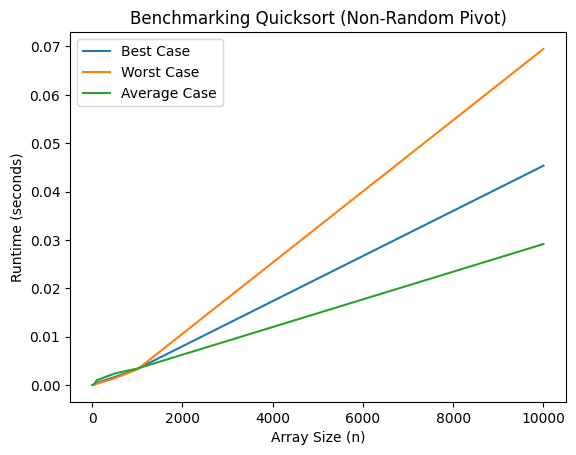

In [ ]:
import timeit
import matplotlib.pyplot as plt

def generate_best_case(n):
    return list(range(n))

def generate_worst_case(n):
    return list(range(n, 0, -1))

def generate_average_case(n):
    return random.sample(range(n), n)

def benchmark_quicksort(func, input_generator, sizes):
    runtimes = []

    for size in sizes:
        input_data = input_generator(size)
        runtime = timeit.timeit(lambda: func(input_data), number=10) / 10  # 10 repetitions and average
        runtimes.append(runtime)

    return runtimes
sizes = [10, 50, 100, 500, 1000,10000]
best_case_runtimes = benchmark_quicksort(quicksort, generate_best_case, sizes)
worst_case_runtimes = benchmark_quicksort(quicksort, generate_worst_case, sizes)
average_case_runtimes = benchmark_quicksort(quicksort, generate_average_case, sizes)

# Plotting
plt.plot(sizes, best_case_runtimes, label='Best Case')
plt.plot(sizes, worst_case_runtimes, label='Worst Case')
plt.plot(sizes, average_case_runtimes, label='Average Case')

plt.xlabel('Array Size (n)')
plt.ylabel('Runtime (seconds)')
plt.title('Benchmarking Quicksort (Non-Random Pivot)')
plt.legend()
plt.show()